In [1]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.title_fontsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

Plot attention score along the sequence of VpdB and VaxB

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


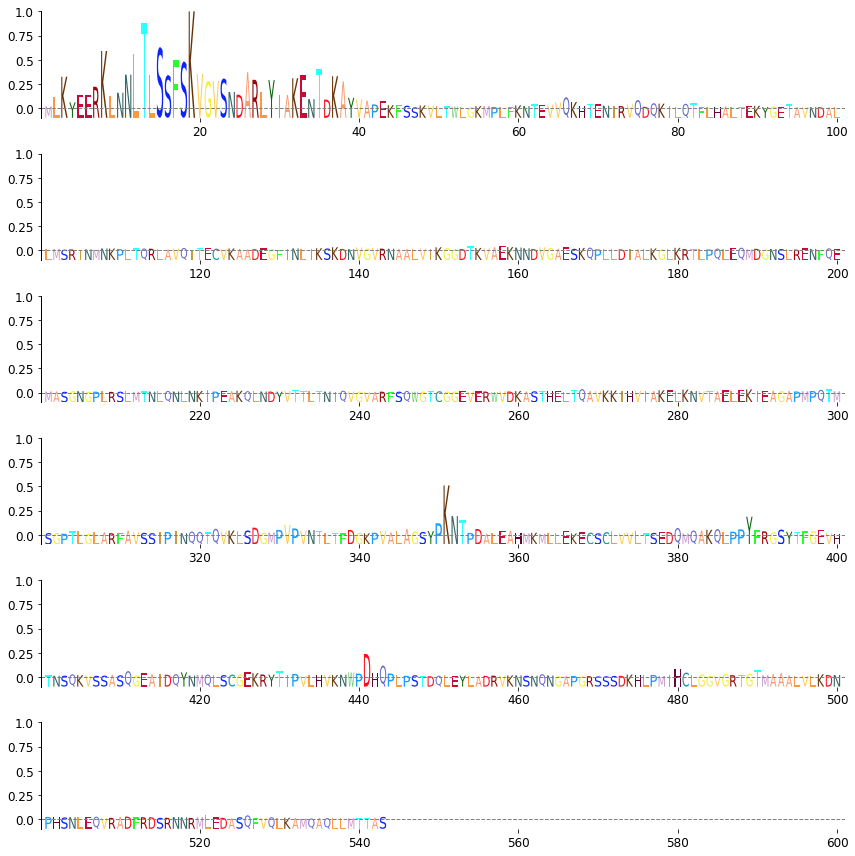

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from Bio import SeqIO
import logomaker as lm

offset = .1

data = np.load('data/attn_T3.npz')
fasta_dict = SeqIO.to_dict(SeqIO.parse('data/Test-attn_T3.fasta', 'fasta'))

for key, value in data.items():
    seq = list(fasta_dict[key].seq[:1020])
    attn = value
    max_attn = max(attn)

    df = pd.DataFrame({'character': seq, 'value': attn})
    saliency_df = lm.saliency_to_matrix(
        seq=df['character'], values=df['value'] / max_attn + offset)

    rows = math.ceil(len(saliency_df) / 100)
    labels = [0.00, 0.25, 0.50, 0.75, 1.00]

    fig, axes = plt.subplots(rows, 1, figsize=(12, 2*rows))

    for i in range(rows):
        tempdf = saliency_df[i*100:(i+1)*100]
        tempdf.set_index(
            [pd.Index(np.array(tempdf.index)-100*i)], inplace=True)
        logo = lm.Logo(tempdf,
                       color_scheme='skylign_protein',
                       vpad=0,
                       width=0.8,
                       font_weight='normal',
                       ax=axes if rows == 1 else axes[i])

        logo.ax.set_ylim([0, 1])
        logo.ax.set_yticks(np.array(labels) + offset)
        logo.ax.set_yticklabels(labels)
        logo.ax.set_xlim([-1, 100])
        logo.ax.set_xticks([19, 39, 59, 79, 99])
        logo.ax.set_xticklabels(np.array([20, 40, 60, 80, 100]) + 100*i)
        logo.style_spines(visible=False)
        logo.style_spines(spines=['left'], visible=True)
        logo.ax.axhline(offset, color='gray', linewidth=1, linestyle='--')

    plt.tight_layout()
    plt.savefig(f'pdf/{key}-attn.pdf')
